In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
# remove flags from columns
# see Annex 2 in http://ec.europa.eu/eurostat/cache/metadata/Annexes/migr_asyapp_esms_an6.pdf
def remove_flags(s):
    return s.strip("bepuzdo ")
converters = {i : remove_flags for i in range(6,113)}

with open("../migr_asyappctzm.tsv","r") as infile:
    df = pd.read_csv(infile,sep=",| ?\t",engine="python",na_values=":",converters=converters)

# values will be have been read as strings, so change to float
for i in range(6,113):
    df[df.columns[i]] = pd.to_numeric(df[df.columns[i]])

Find the ten countries with the highest influx of asylum seekers at the latest recorded time and plot their overall history:

In [39]:
# 'T' indicates total number, regardless of gender
sums = df[df.sex=="T"].groupby("geo").sum()
top_indices = sums.iloc[:,-1].sort_values().index[-13:-1]
for country in top_indices:
    print(country + " : " + str(sums.ix[country,-1]))

NO : 10045.0
EL : 10070.0
CH : 11485.0
NL : 11650.0
IT : 13890.0
BE : 14970.0
UK : 16495.0
FR : 17010.0
DE : 32510.0
SE : 38330.0
EU28 : 188640.0
TOTAL : 210585.0


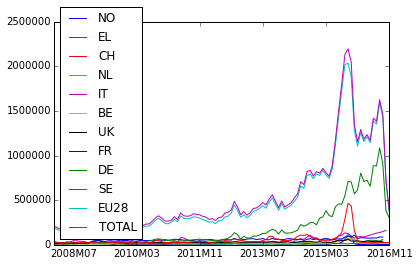

In [49]:
sums.loc[top_indices].transpose().plot()
plt.gca().invert_xaxis()
legend(top_indices,loc="best")

EU28 and total numbers make it hard to see detail, let's ignore those:

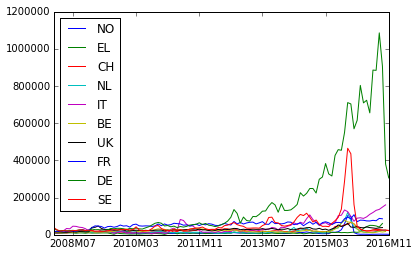

In [50]:
sums.ix[top_indices[0:-2]].transpose().plot()
plt.gca().invert_xaxis()
legend(top_indices[0:-2],loc="best")

Is the trend of mostly male asylum seekers consistent in time?

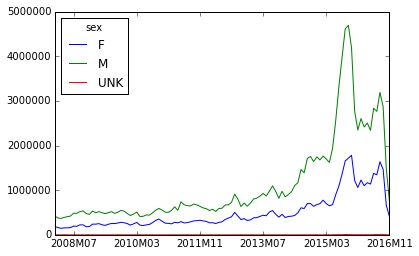

In [89]:
df_gender = df.groupby("sex").sum()
df_gender.loc[['F','M','UNK']].transpose().plot()
plt.gca().invert_xaxis()

Which countries do most seekers come from?

In [85]:
df_origin = df.groupby("citizen").sum()
top_countries = df_origin.iloc[:,-1].sort_values(ascending=False).index[2:12]
for country in top_countries:
    print(country + " : " + str(df_origin.ix[country,-1]))

IQ : 88050.0
RU : 39285.0
SO : 26125.0
RS : 23215.0
AF : 18255.0
ER : 13695.0
PK : 12970.0
IR : 12370.0
NG : 12310.0
TR : 12275.0


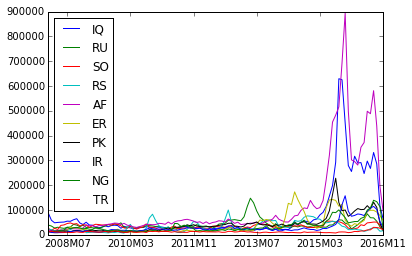

In [101]:
df_origin.ix[top_countries].transpose().plot()
plt.gca().invert_xaxis()
legend(top_countries,loc="best")

This shows a huge spike in the number of asylum seekers from Iraq and Afghanistan around the spring of 2015, sustained to the end of 2016. If we look at the relative numbers, as a percentage of total asylum seekers:

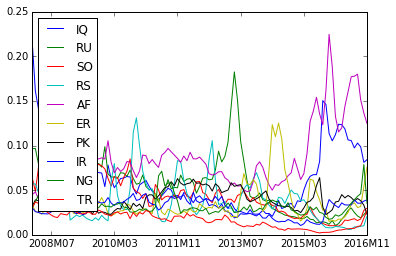

In [102]:
(df_origin.ix[top_countries] / df_origin.ix['TOTAL']).transpose().plot()
plt.gca().invert_xaxis()
legend(top_countries,loc="upper left")

The increase is still visible but is now less marked - obviously due to a very large increase in total applications.